In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# New Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

#from sklearn.metrics import accuracy_score roc_auc_score, classification_report, plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
#from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
#!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance

import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,4.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,2.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


In [ ]:
# Drop unnecessary columns
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
# Check size of the data set
#train.info()

# Drop unnecessary columns
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)
# Check size of the data set
#test.info()

In [ ]:
#Replace spaces in the column names with underscore - Train and Test
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

#Replacing label column "satisfaction" values with 0 and 1 (neutral or dissatisfied = 0 and satisfied = 1) - Train and Test
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [ ]:
# Imputing missing value with mean - Train and Test
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

# EDA

# Check for the nature of dataset - balanced or imbalanced

The plot shows a distribution of around 55:45 between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special resampling methods to be implemented.

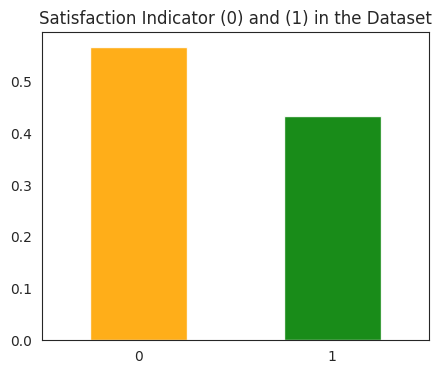

In [ ]:
#Check for the nature of dataset - balanced or imbalanced

fig = plt.figure(figsize = (5,4))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['orange','green'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()


# type of travel - satsfacion

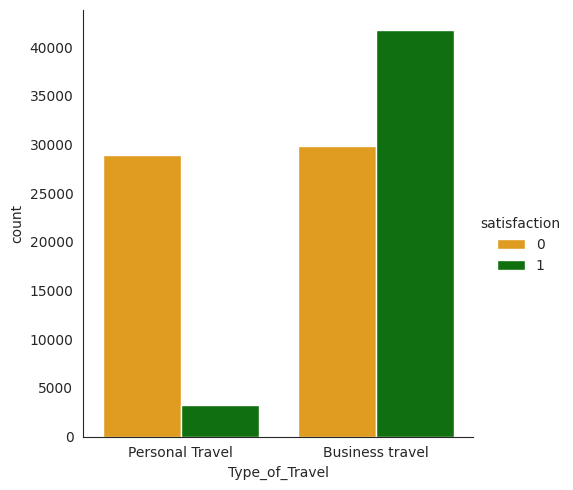

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="Type_of_Travel", hue="satisfaction", data=train, kind="count", palette=["orange", "green"])


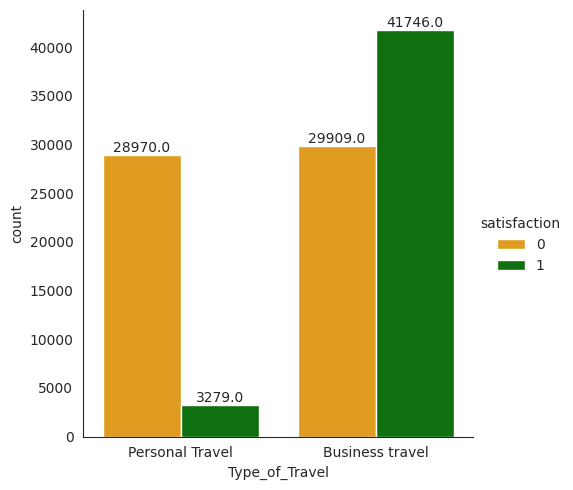

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="Type_of_Travel", hue="satisfaction", data=train, kind="count", palette=["orange", "green"])

    # Access the axes of the count plot
    ax = g.ax

    # Iterate over each bar in the plot
    for p in ax.patches:
        # Get the height of the bar
        height = p.get_height()

        # Print the number on top of each bar
        ax.annotate(height, (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

# Show the plot
plt.show()


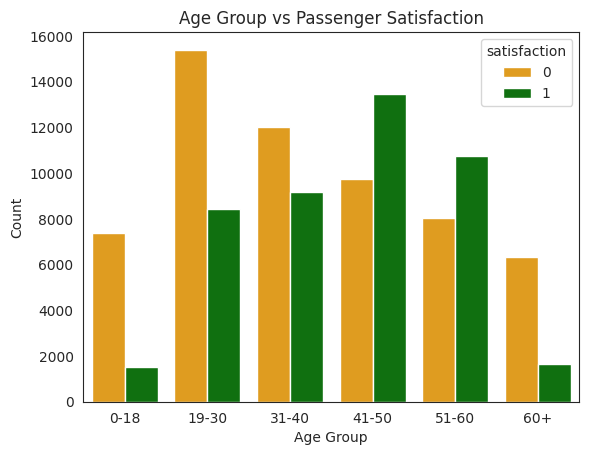

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the age ranges
age_ranges = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']

# Create a new column with the age groups
train['Age Group'] = pd.cut(train['Age'], bins=age_ranges, labels=age_labels)

with sns.axes_style('white'):
    g = sns.countplot(x="Age Group", hue="satisfaction", data=train, palette=["orange", "green"])
    g.set(xlabel='Age Group', ylabel='Count', title='Age Group vs Passenger Satisfaction')
    plt.show()


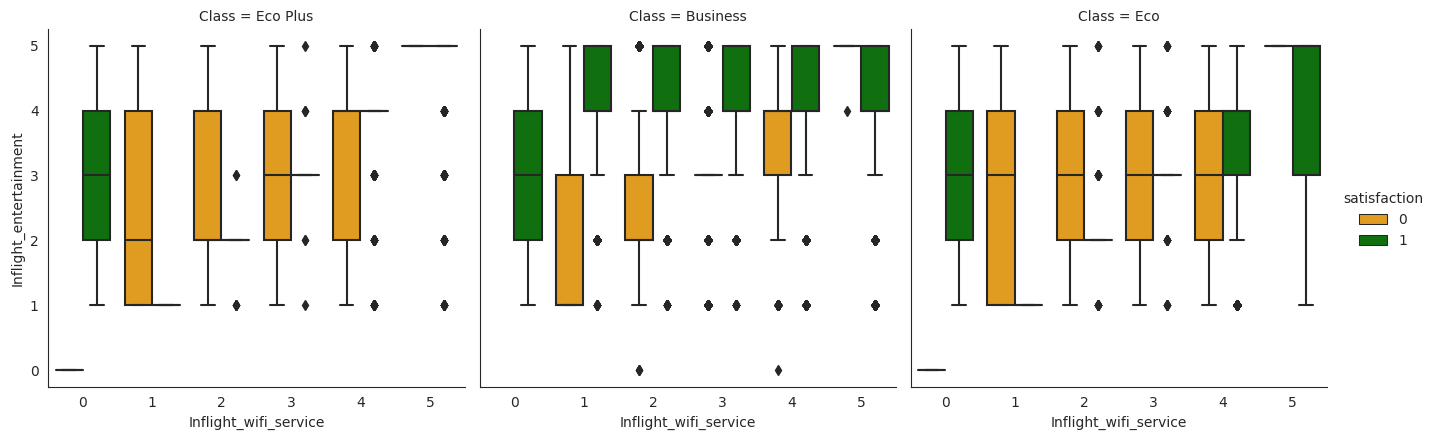

In [ ]:
import seaborn as sns

# Define the custom color palette
custom_palette = ["orange", "green"]

with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0, palette=custom_palette)


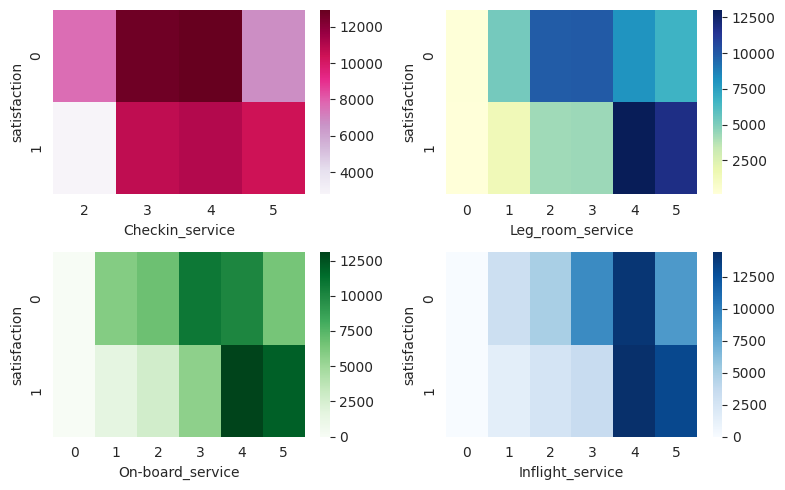

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(8, 5))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='PuRd', ax=axarr[0][0])

table2 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table2, cmap='YlGnBu', ax=axarr[0][1])

table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='Greens', ax=axarr[1][0])

table4 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table4, cmap='Blues', ax=axarr[1][1])

plt.tight_layout()
plt.show()


# New Section

# New Section

In [ ]:
# Replace NaN with mode for categorical variables - Train and Test

train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

In [ ]:
# For Train set
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

    # For Test Set
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1328.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [ ]:
# Removal of outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(57891, 23)

In [ ]:
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,2,2,460.0,3.0,4.0,3.0,1.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,0.0
2,0,0,26,0,0,1142.0,2.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,1.0
4,1,0,61,0,0,214.0,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,1.0
5,0,0,26,2,1,1180.0,3.0,4.0,2.0,1.0,...,1.0,3.0,4.0,4.0,4.0,4.0,1.0,0.0,0.0,0.0
6,1,0,47,2,1,1276.0,2.0,4.0,2.0,3.0,...,2.0,3.0,3.0,4.0,3.0,5.0,2.0,9.0,23.0,0.0


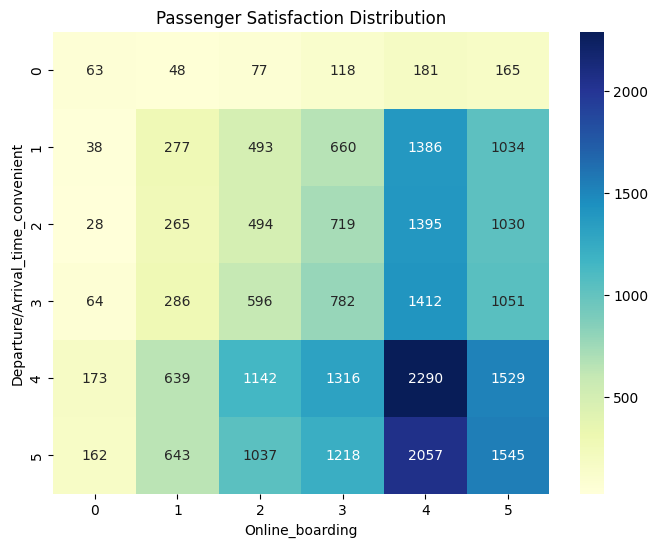

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table with Online_boarding, Departure/Arrival_time_convenient, and satisfaction as columns
pivot_table = pd.pivot_table(train, values='satisfaction', index=['Departure/Arrival_time_convenient'], columns=['Online_boarding'], aggfunc=len, fill_value=0)

# Convert the pivot table to a DataFrame
df_output = pd.DataFrame(pivot_table.values)

# Visualize the DataFrame as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_output, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Online_boarding')
plt.ylabel('Departure/Arrival_time_convenient')
plt.title('Passenger Satisfaction Distribution')
plt.show()


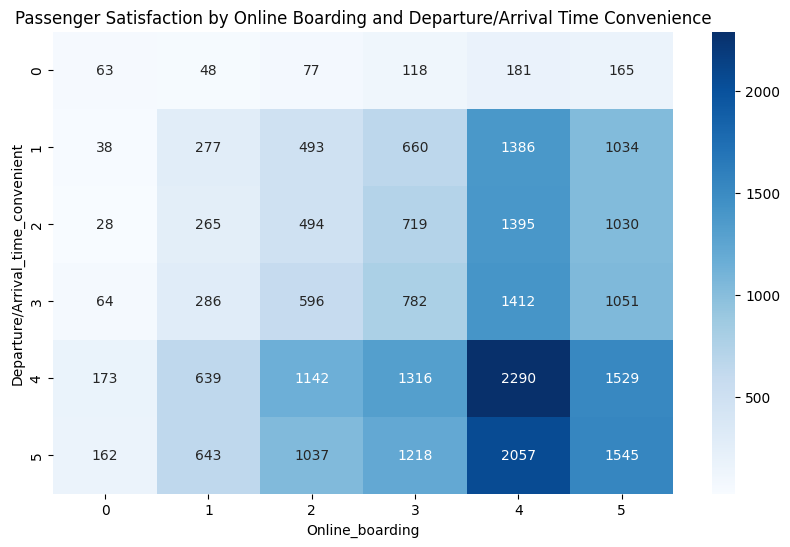

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table with Online_boarding, Departure/Arrival_time_convenient, and satisfaction as columns
pivot_table = pd.pivot_table(train, values='satisfaction', index=['Departure/Arrival_time_convenient'], columns=['Online_boarding'], aggfunc=len, fill_value=0)

# Convert the pivot table to a DataFrame
df_output = pd.DataFrame(pivot_table.values)

# Create the heatmap with annotations
plt.figure(figsize=(10, 6))
sns.heatmap(df_output, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Online_boarding')
plt.ylabel('Departure/Arrival_time_convenient')
plt.title('Passenger Satisfaction by Online Boarding and Departure/Arrival Time Convenience')

# Show the plot
plt.show()
